# Data Collection

In [142]:
import pandas as pd
import numpy as np

In [143]:
data = pd.read_csv(r"C:\Users\geeth\Downloads\Uber-Jan-Feb-FOIL.csv")

In [144]:
data.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


In [145]:
data.tail()

,dispatching_base_number,date,active_vehicles,trips
349,B02764,2/28/2015,3952,39812
350,B02617,2/28/2015,1372,14022
351,B02682,2/28/2015,1386,14472
352,B02512,2/28/2015,230,1803
353,B02765,2/28/2015,747,7753


In [146]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dispatching_base_number  354 non-null    object
 1   date                     354 non-null    object
 2   active_vehicles          354 non-null    int64 
 3   trips                    354 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.2+ KB
None


In [147]:
data.shape

(354, 4)

In [148]:
data.describe()

,active_vehicles,trips
count,354.000000,354.000000
mean,1307.435028,11667.316384
std,1162.510626,10648.284865
min,112.000000,629.000000
25%,296.750000,2408.500000
50%,1077.000000,9601.000000
75%,1417.000000,13711.250000
max,4395.000000,45858.000000


# Data Cleaning

In [149]:
data.isnull().sum()

dispatching_base_number    0
date                       0
active_vehicles            0
trips                      0
dtype: int64

In [150]:
print(data.columns)

Index(['dispatching_base_number', 'date', 'active_vehicles', 'trips'], dtype='object')


# Steps and Implementation

# Step 1: Data Preprocessing

In [156]:
data['date'] = pd.to_datetime(data['date'])

# Create new columns
data['Day'] = data['date'].dt.day
data['Month'] = data['date'].dt.month_name()
data['DayOfWeek'] = data['date'].dt.dayofweek
data['Weekday'] = data['date'].dt.day_name()
data['Week_Num'] = data['date'].dt.isocalendar().week
data['Is_Weekend'] = data['Weekday'].isin(['Saturday', 'Sunday'])

# Calculate trips per vehicle
data['Trips_per_Vehicle'] = data['trips'] / data['active_vehicles']


In [157]:
data

,dispatching_base_number,date,active_vehicles,trips,Day,Month,Weekday,Trips_per_Vehicle,DayOfWeek,Week_Num,Is_Weekend
0,B02512,2015-01-01,190,1132,1,January,Thursday,5.957895,3,1,False
1,B02765,2015-01-01,225,1765,1,January,Thursday,7.844444,3,1,False
2,B02764,2015-01-01,3427,29421,1,January,Thursday,8.585060,3,1,False
3,B02682,2015-01-01,945,7679,1,January,Thursday,8.125926,3,1,False
4,B02617,2015-01-01,1228,9537,1,January,Thursday,7.766287,3,1,False
...,...,...,...,...,...,...,...,...,...,...,...
349,B02764,2015-02-28,3952,39812,28,February,Saturday,10.073887,5,9,True
350,B02617,2015-02-28,1372,14022,28,February,Saturday,10.220117,5,9,True
351,B02682,2015-02-28,1386,14472,28,February,Saturday,10.441558,5,9,True
352,B02512,2015-02-28,230,1803,28,February,Saturday,7.839130,5,9,True


# Step 2: Exploratory Data Analysis (EDA)

<Axes: xlabel='trips', ylabel='Count'>

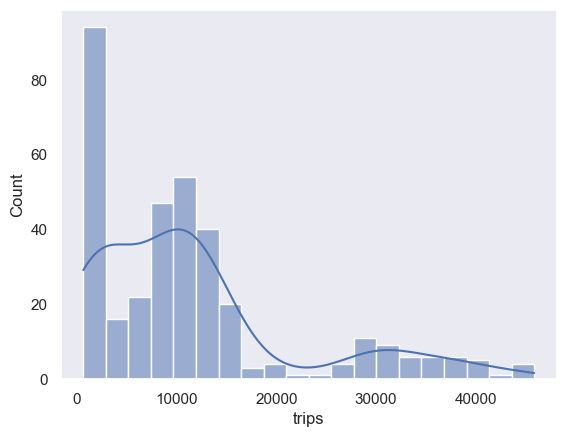

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='dark')
sns.histplot(data["trips"], kde = True, bins = 20)

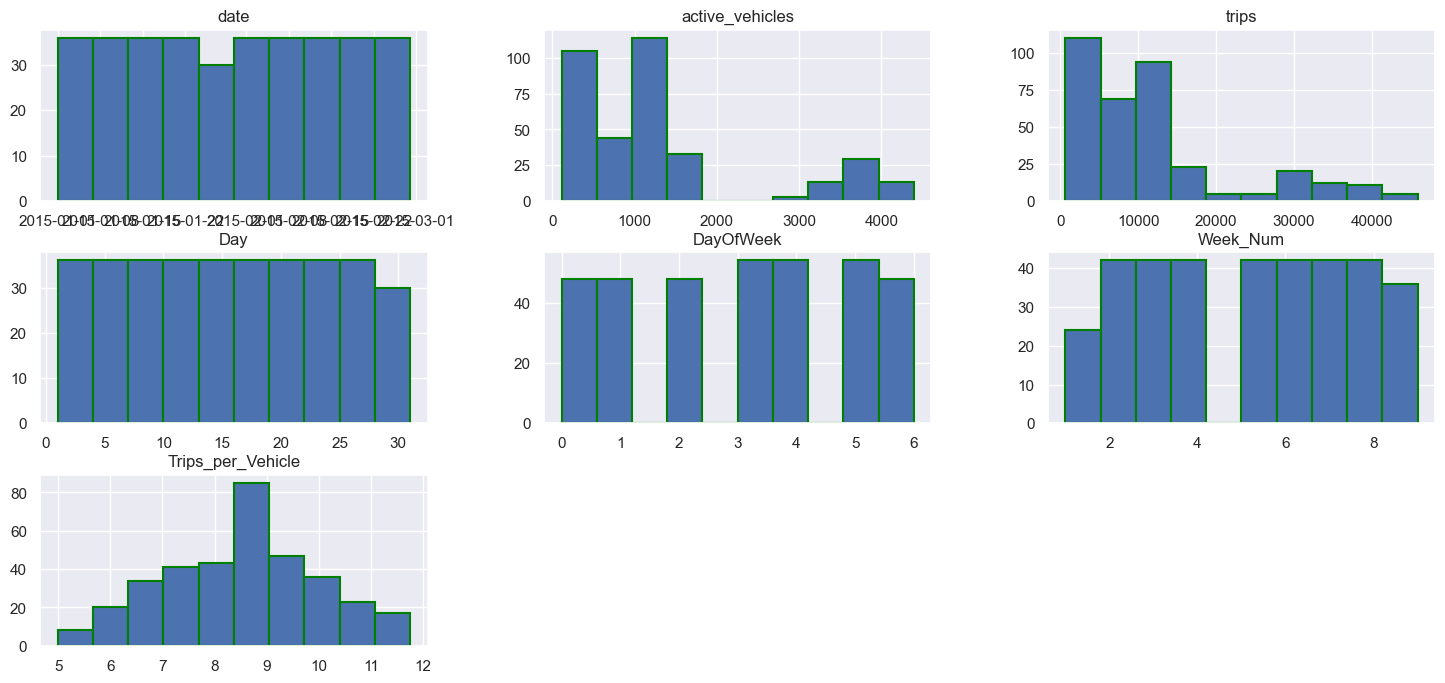

In [109]:
data.hist(edgecolor='green', linewidth=1.5, figsize=(18,8));
plt.show()

# Trips Per Month

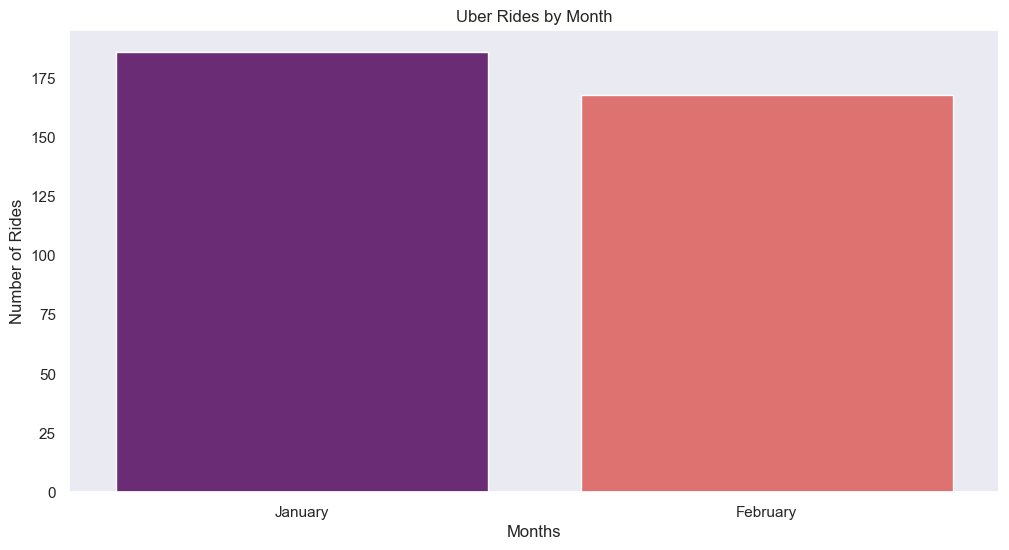

In [110]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', data=data, palette='magma')
plt.title('Uber Rides by Month')
plt.xlabel('Months')
plt.ylabel('Number of Rides')
#plt.grid(True)
plt.show()

# Trips over Weekdays

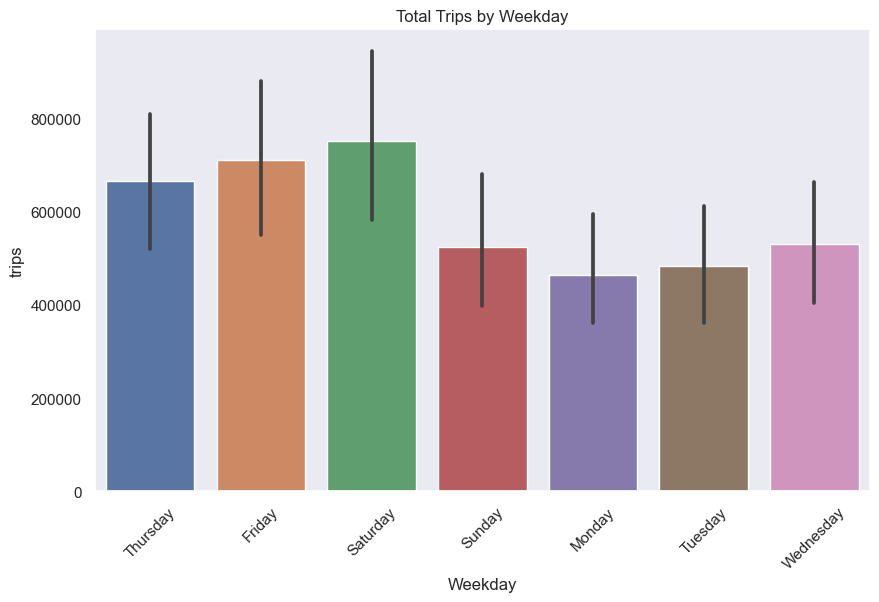

In [111]:
plt.figure(figsize=(10,6))
sns.barplot(data=data, x='Weekday', y='trips', estimator='sum')
plt.title('Total Trips by Weekday')
plt.xticks(rotation=45)
plt.show()

# Trips per Vehicle

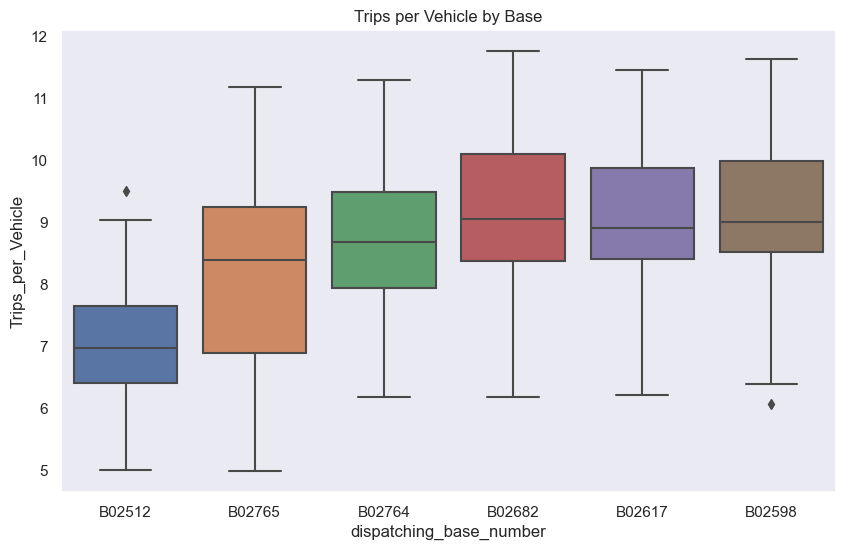

In [112]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='dispatching_base_number', y='Trips_per_Vehicle')
plt.title('Trips per Vehicle by Base')
plt.show()

# Trips Over Time (Line Plot)

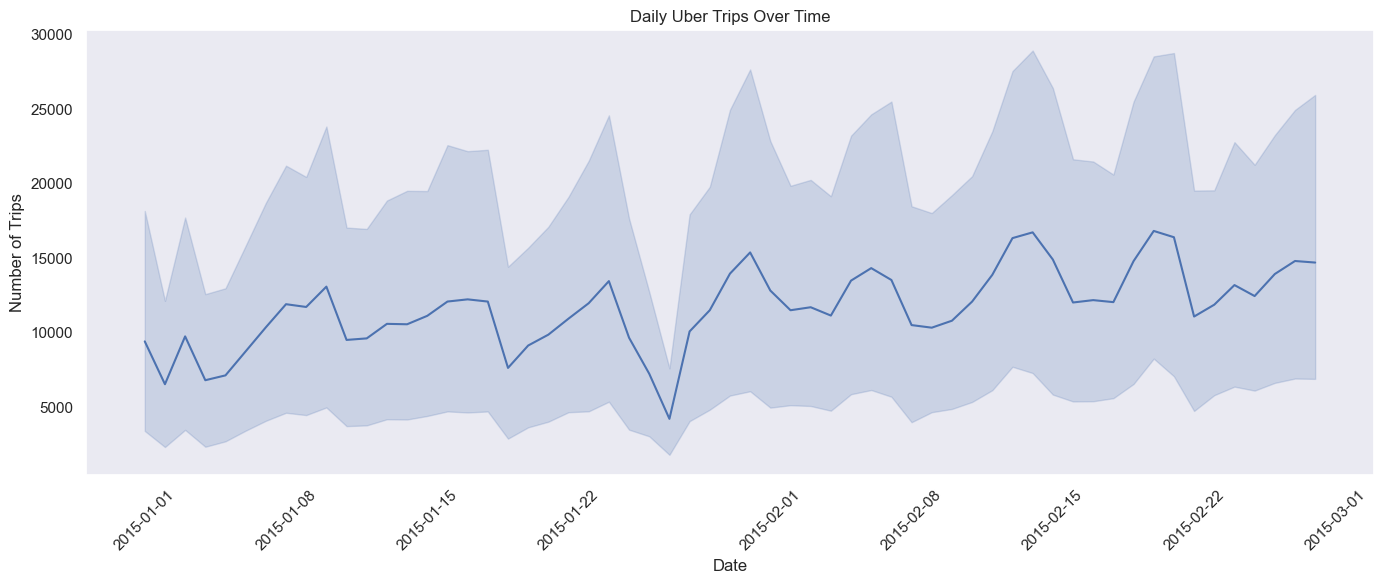

In [113]:
plt.figure(figsize=(14,6))
sns.lineplot(data=data, x='date', y='trips')
plt.title('Daily Uber Trips Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Active Vehicles vs Trips (Scatter Plot)

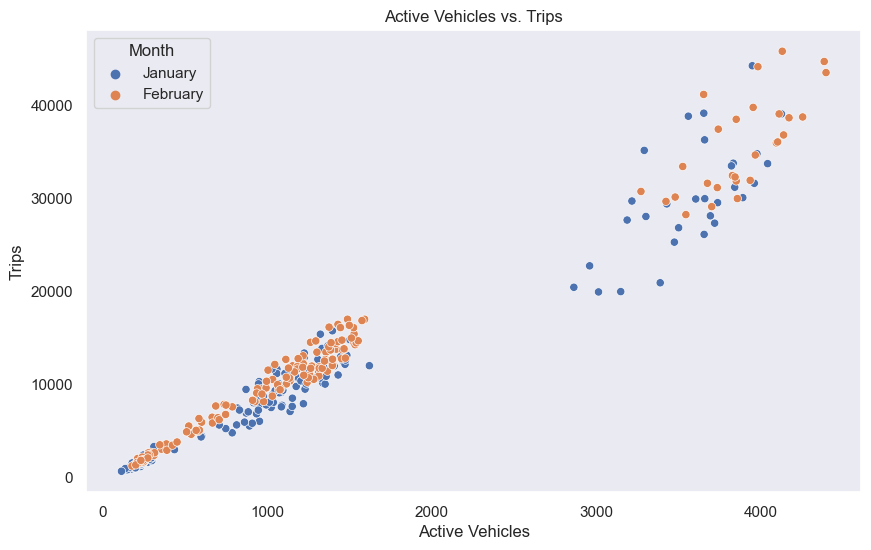

In [114]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='active_vehicles', y='trips', hue='Month')
plt.title('Active Vehicles vs. Trips')
plt.xlabel('Active Vehicles')
plt.ylabel('Trips')
plt.show()


# Average Trips per Vehicle by Weekday (Bar Plot)

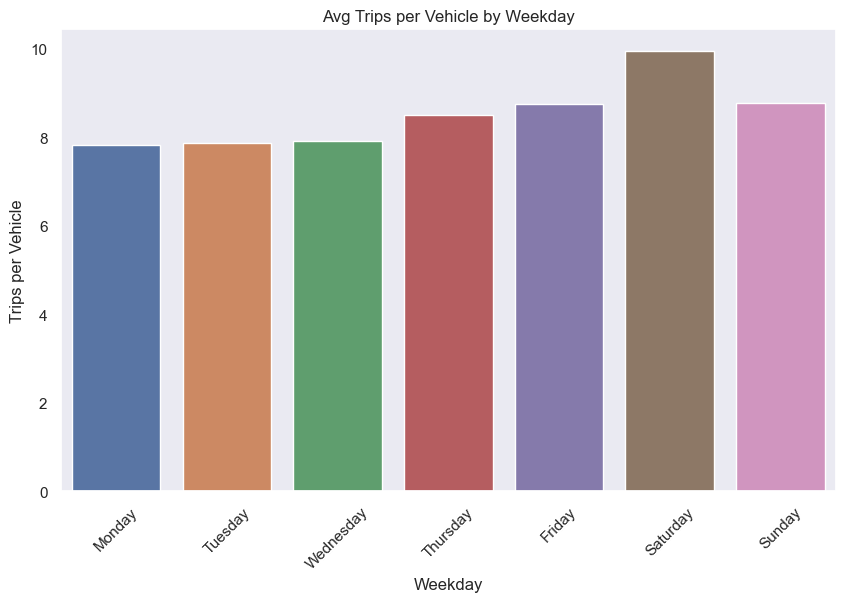

In [115]:
weekday_avg = data.groupby('Weekday')['Trips_per_Vehicle'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

plt.figure(figsize=(10,6))
sns.barplot(x=weekday_avg.index, y=weekday_avg.values)
plt.title('Avg Trips per Vehicle by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Trips per Vehicle')
plt.xticks(rotation=45)
plt.show()

# Trips Distribution by Base (Box Plot)

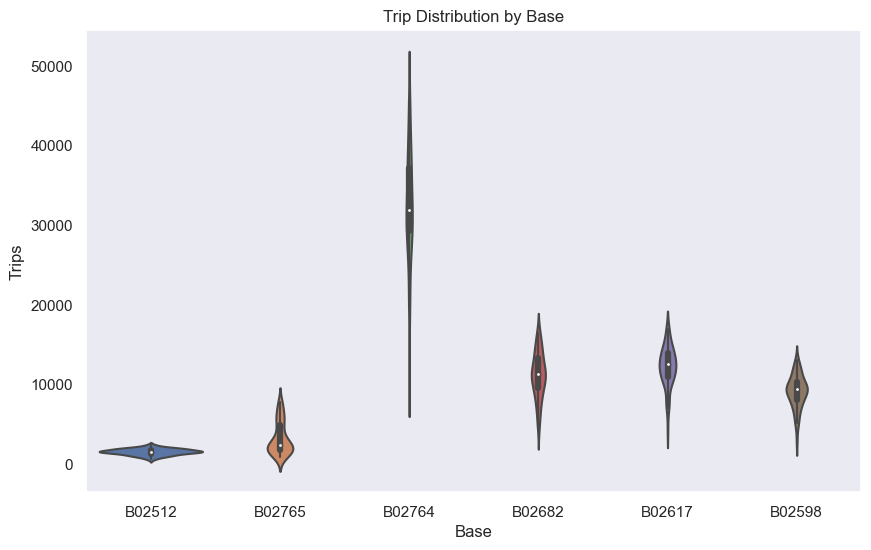

In [116]:
plt.figure(figsize=(10,6))
sns.violinplot(data=data, x='dispatching_base_number', y='trips')
plt.title('Trip Distribution by Base')
plt.xlabel('Base')
plt.ylabel('Trips')
plt.show()


# Weekend vs Weekday Trips (Pie Chart)

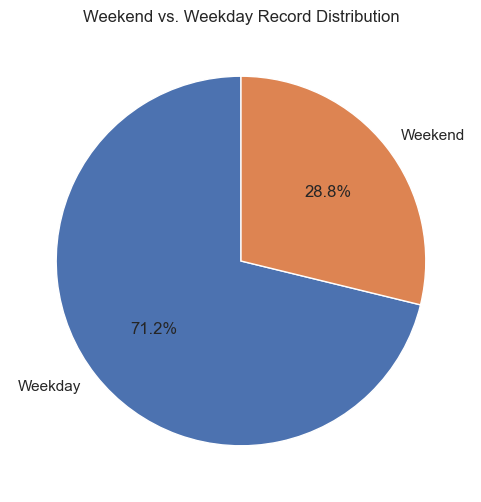

In [117]:
weekend_counts = data['Is_Weekend'].value_counts()
weekend_counts.index = ['Weekday', 'Weekend']

plt.figure(figsize=(6,6))
plt.pie(weekend_counts, labels=weekend_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Weekend vs. Weekday Record Distribution')
plt.show()


<Axes: xlabel='trips', ylabel='Density'>

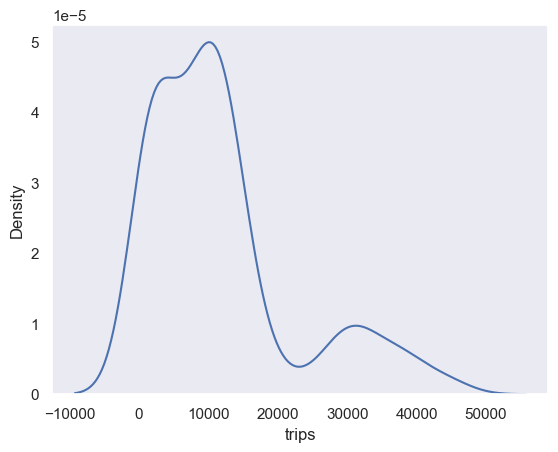

In [118]:
sns.kdeplot(x=data["trips"])

# Uber Pickups by Day – Frequency Analysis

In [123]:
data['Day'] = data['date'].dt.day

In [124]:
day_frequency = data['Day'].value_counts().sort_index()

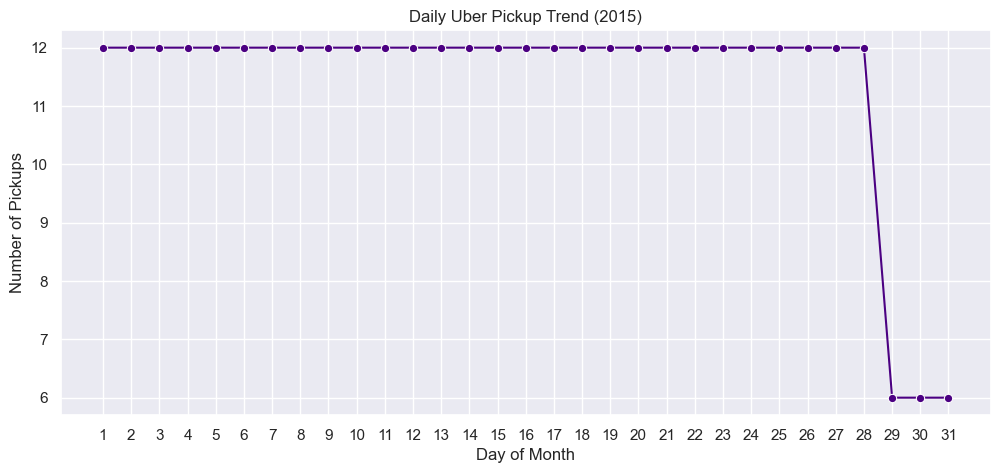

In [125]:
plt.figure(figsize=(12, 5))
sns.lineplot(x=day_frequency.index, y=day_frequency.values, marker='o', color='indigo')
plt.title('Daily Uber Pickup Trend (2015)')
plt.xlabel('Day of Month')
plt.ylabel('Number of Pickups')
plt.grid(True)
plt.xticks(range(1, 32))
plt.show()

# Step 3: Feature Engineering

In [128]:
# Only encode if not already encoded
if 'dispatching_base_number' in data.columns:
    data = pd.get_dummies(data, columns=['dispatching_base_number'], drop_first=True)

if 'Weekday' in data.columns:
    data = pd.get_dummies(data, columns=['Weekday'], drop_first=True)

if 'Month' in data.columns and data['Month'].dtype == 'object':
    data = pd.get_dummies(data, columns=['Month'], drop_first=True)

In [129]:
data.head()

,date,active_vehicles,trips,Day,DayOfWeek,Week_Num,Is_Weekend,Trips_per_Vehicle,dispatching_base_number_B02598,dispatching_base_number_B02617,dispatching_base_number_B02682,dispatching_base_number_B02764,dispatching_base_number_B02765,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,Month_January
0,2015-01-01,190,1132,1,3,1,False,5.957895,False,False,False,False,False,False,False,False,True,False,False,True
1,2015-01-01,225,1765,1,3,1,False,7.844444,False,False,False,False,True,False,False,False,True,False,False,True
2,2015-01-01,3427,29421,1,3,1,False,8.585060,False,False,False,True,False,False,False,False,True,False,False,True
3,2015-01-01,945,7679,1,3,1,False,8.125926,False,False,True,False,False,False,False,False,True,False,False,True
4,2015-01-01,1228,9537,1,3,1,False,7.766287,False,True,False,False,False,False,False,False,True,False,False,True


# Step 4: Model Building

In [130]:
data = data.dropna()

# Recreate features and target AFTER encoding
X = data.drop(['date', 'active_vehicles', 'trips'], axis=1)
y = data['trips']


In [131]:
print(X.dtypes)

Day                                 int32
DayOfWeek                           int32
Week_Num                           UInt32
Is_Weekend                           bool
Trips_per_Vehicle                 float64
dispatching_base_number_B02598       bool
dispatching_base_number_B02617       bool
dispatching_base_number_B02682       bool
dispatching_base_number_B02764       bool
dispatching_base_number_B02765       bool
Weekday_Monday                       bool
Weekday_Saturday                     bool
Weekday_Sunday                       bool
Weekday_Thursday                     bool
Weekday_Tuesday                      bool
Weekday_Wednesday                    bool
Month_January                        bool
dtype: object


In [132]:
features = [
    'Day', 'active_vehicles',
    'dispatching_base_number_B02598',
    'dispatching_base_number_B02617',
    'dispatching_base_number_B02682',
    'dispatching_base_number_B02764',
    'dispatching_base_number_B02765',
    'Weekday_Monday', 'Weekday_Tuesday', 'Weekday_Wednesday',
    'Weekday_Thursday', 'Weekday_Saturday', 'Weekday_Sunday','Month_January'
]

target = 'trips'

X = data[features]
y = data[target]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [133]:

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Linear Regression:")
print("  MAE:", mean_absolute_error(y_test, y_pred_lr))
print("  RMSE:", mean_squared_error(y_test, y_pred_lr, squared=False))
print("  R²:", r2_score(y_test, y_pred_lr))

print("\nRandom Forest Regressor:")
print("  MAE:", mean_absolute_error(y_test, y_pred_rf))
print("  RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))
print("  R²:", r2_score(y_test, y_pred_rf))


Linear Regression:
  MAE: 1022.1103480976677
  RMSE: 1337.5253000430844
  R²: 0.9834092539439128

Random Forest Regressor:
  MAE: 929.7653521126762
  RMSE: 1305.008255914741
  R²: 0.9842061349506573


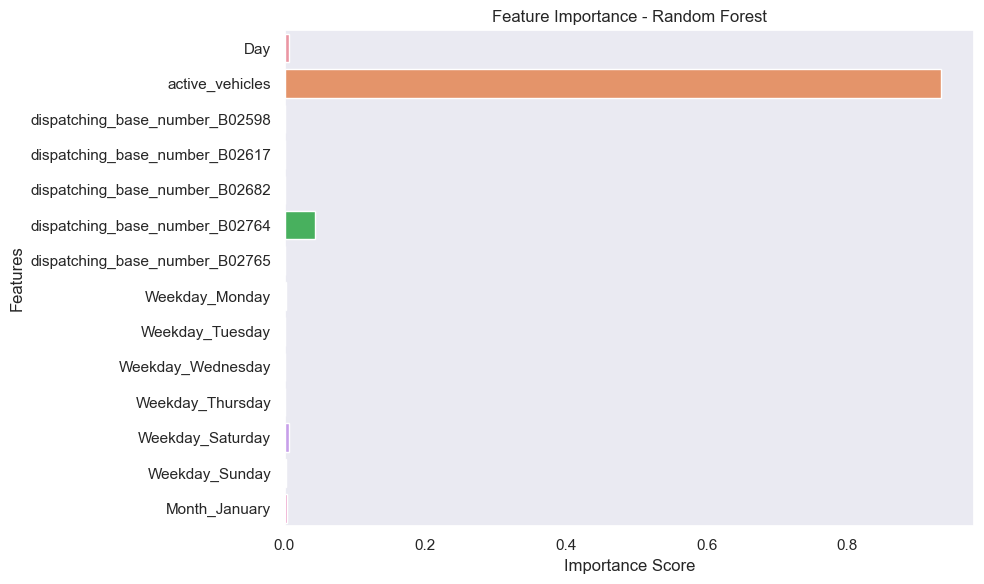

In [134]:

import matplotlib.pyplot as plt
import seaborn as sns

# Your selected feature list
feature_names = [
    'Day','active_vehicles',
    'dispatching_base_number_B02598',
    'dispatching_base_number_B02617',
    'dispatching_base_number_B02682',
    'dispatching_base_number_B02764',
    'dispatching_base_number_B02765',
    'Weekday_Monday', 'Weekday_Tuesday', 'Weekday_Wednesday',
    'Weekday_Thursday', 'Weekday_Saturday', 'Weekday_Sunday', 'Month_January'
]

importances = rf.feature_importances_

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()



# Step 5: Model Evaluation

In [135]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 1703046.5480056342
R^2 Score: 0.9842061349506573


# Step 6: Visualization of Predictions
Scatter Plot of Actual vs predicted correlation

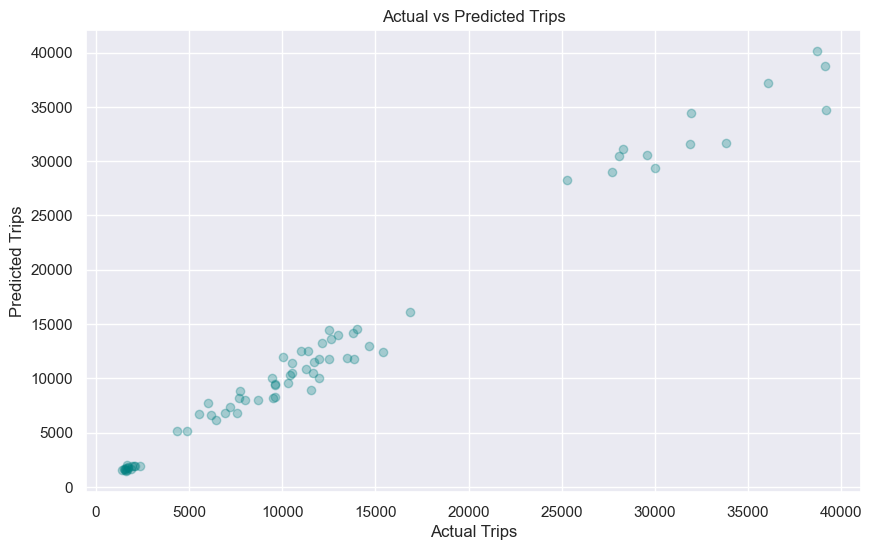

In [136]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.3, color='teal')
plt.xlabel('Actual Trips')
plt.ylabel('Predicted Trips')
plt.title('Actual vs Predicted Trips')
plt.grid(True)
plt.show()


# Line Plot of Predicted vs Actual Line Plot (Top 100 Samples)

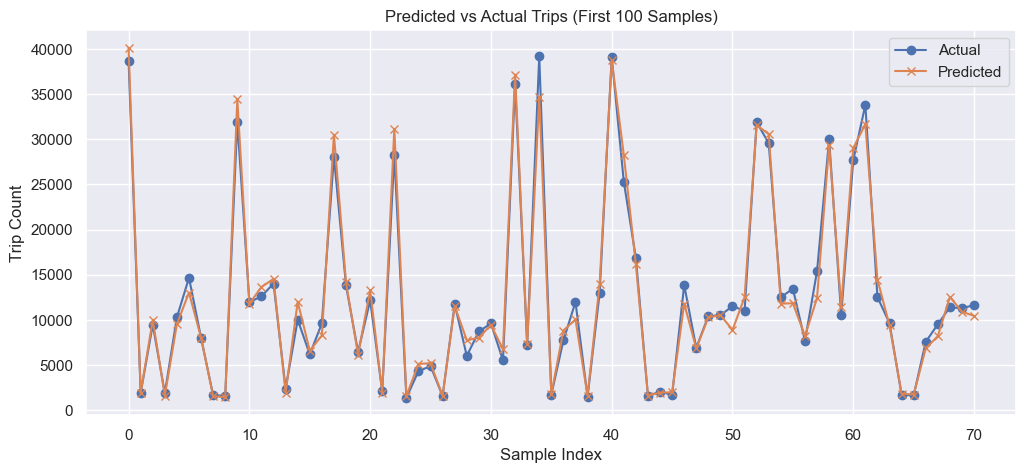

In [137]:
plt.figure(figsize=(12, 5))
plt.plot(y_test.values[:100], label='Actual', marker='o')
plt.plot(y_pred[:100], label='Predicted', marker='x')
plt.title('Predicted vs Actual Trips (First 100 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Trip Count')
plt.legend()
plt.grid(True)
plt.show()